In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/License Plate Recognition.v6i.yolov8.zip'


Archive:  /content/drive/MyDrive/License Plate Recognition.v6i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/05087525-2018-lexus-ls-500-2_jpeg_jpg.rf.8d22ca071538b94f3b348261da2e8b60.jpg  
 extracting: test/images/0g2rd8ht30ny_jpeg_jpg.rf.7fb73856b79aaf7c3ed31d6d55445a66.jpg  
 extracting: test/images/1000715385-license-plate-sting-1-1226x0-c-default_jpeg_jpg.rf.f07de063d34c15ac0474c134f1c66628.jpg  
 extracting: test/images/146407_7d361741ad2b465285c87e3ead9c56bf_1611083637_jpeg_jpg.rf.e946714e3a2960202641201a204ff925.jpg  
 extracting: test/images/2235978325_2ea96dd00c_z_jpeg_jpg.rf.684b7d71bc5db65b800d3caa430374de.jpg  
 extracting: test/images/2eff96b0-5234-11e9-9eaf-881ce4aedc87_jpeg_jpg.rf.9296d723c27141517658c376a1747a7d.jpg  
 extracting: test/images/4fb91306-3ec0-4b63-bf47-579a3688d7fc_750x422_jpeg_jpg.rf.a0a00e04a00e248ea7a05cfa9

In [ ]:
ROOT_DIR='/content/drive/MyDrive/train'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO

In [ ]:
model=YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
results = model.train(data = os.path.join(ROOT_DIR,'/content/data.yaml'),epochs = 20 )

Ultralytics YOLOv8.0.190 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa


0: 640x640 1 License-Plate, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


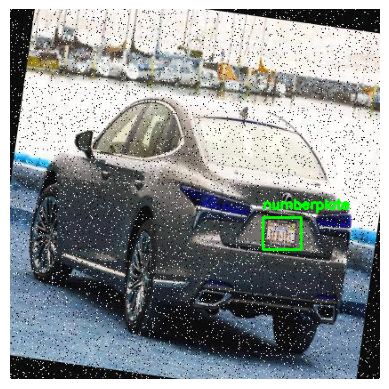

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/test/images/05087525-2018-lexus-ls-500-2_jpeg_jpg.rf.8d22ca071538b94f3b348261da2e8b60.jpg'
img = cv2.imread(image_path)


results = model([img])


detections = results[0].boxes.data.cpu().numpy()


for box in detections:
    x1, y1, x2, y2, _, class_label = box
    class_label = int(class_label)


    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    if class_label==0:
      class_label='numberplate'
    cv2.putText(img, class_label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img)
plt.axis('off')
plt.show()
cv2.destroyAllWindows()